In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

# What happens when you have a continous variable and lots of categories describing it.  

## Let's use data from tree data that Professor Maenza-Gmelch collects each year in intro.

Let's read it in!

In [4]:
df=pd.read_excel('BarnardTrees.xlsx')

In [5]:
df

,Location,old tree number,species,Origin,Lat,Long,Date,DBH_in
0,Broadway,1,pin oak,Native,40.810514,-73.962235,2015-11-01,14.870000
1,Broadway,1,pin oak,Native,40.810514,-73.962235,2016-11-01,15.100000
2,Broadway,1,pin oak,Native,40.810514,-73.962235,2018-11-18,15.483333
3,Broadway,1,pin oak,Native,40.810514,-73.962235,2019-07-01,15.500000
4,Broadway,1,pin oak,Native,40.810514,-73.962235,2020-11-19,15.750000
...,...,...,...,...,...,...,...,...
359,Inside,69,large oak,Native,40.808844,-73.963562,2021-06-21,26.000000
360,Inside,70,large oak,Native,40.808767,-73.963621,2015-11-01,15.200000
361,Inside,70,large oak,Native,40.808767,-73.963621,2016-11-01,15.350000
362,Inside,70,large oak,Native,40.808767,-73.963621,2018-11-18,15.810000


In [11]:
df.describe()

,Lat,Long,DBH_in
count,297.000000,297.000000,364.000000
mean,40.809410,-73.963604,9.439124
std,0.000810,0.000799,6.473284
min,40.808163,-73.964863,1.690000
25%,40.808696,-73.964452,5.195000
50%,40.809218,-73.963490,6.865000
75%,40.810249,-73.962936,12.280000
max,40.810830,-73.962235,30.690000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Location         364 non-null    object        
 1   old tree number  364 non-null    object        
 2   species          364 non-null    object        
 3   Origin           297 non-null    object        
 4   Lat              297 non-null    float64       
 5   Long             297 non-null    float64       
 6   Date             364 non-null    datetime64[ns]
 7   DBH_in           364 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 22.9+ KB


## What do we have?
-  You can look at it in excel
-  For each tree around campus we have it's details and then it's DBH (Diameter Breast Height) (Size) measrued over 5 yers.

### What do we do first? 
-  First I count totals and then I count how many in each group.  
-  I will used count to determine how many trees we know their location.
-  Then you can use value_counts to look at the categories in Location.  Location is a categoical variable.  It lists categories!

In [6]:
df['Location'].count()

364

In [7]:
df['Location'].value_counts()

Claremont    147
Broadway     100
Inside        69
116th         48
Name: Location, dtype: int64

## Now can we get the percent of each location?  Yes!
-  Just divide and multiply by 100.  Pandas keeps it all straight.

In [9]:
df['Location'].value_counts()/df['Location'].count()*100

Claremont    40.384615
Broadway     27.472527
Inside       18.956044
116th        13.186813
Name: Location, dtype: float64

## Pandas keeps our life easy!  Can we turn that into a bar chart?

Text(0, 0.5, 'Percent')

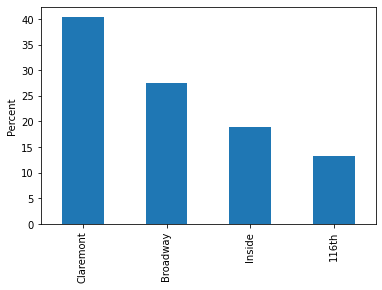

In [10]:
fig,ax=plt.subplots()
(df['Location'].value_counts()/df['Location'].count()*100).plot.bar(ax=ax)
ax.set_ylabel('Percent')

# Homework Part 1.
- Make this graph and make it look good!

Text(0, 0.5, 'Percent')

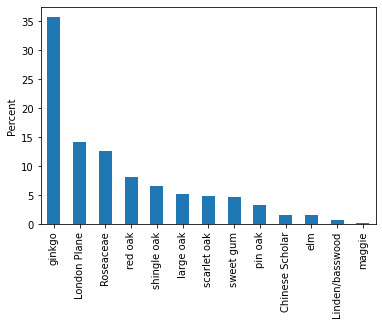

In [71]:
fig,ax=plt.subplots()
(df['species'].value_counts()/df['species'].count()*100).plot.bar(ax=ax)
ax.set_ylabel('Percent')

### What if we want the distribution of DBH.  Describe does well but we can also do the pandas boxplot.

<AxesSubplot:>

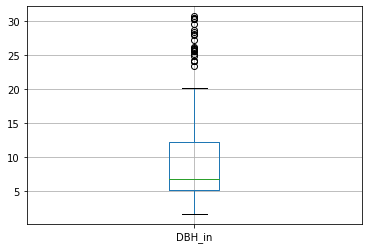

In [18]:
fig,ax=plt.subplots()
df.boxplot(column=['DBH_in'],ax=ax)

### Do you remember now how to show the DBH but split by the categorical column Location?  We have done it before!

<AxesSubplot:title={'center':'DBH_in'}, xlabel='Location'>

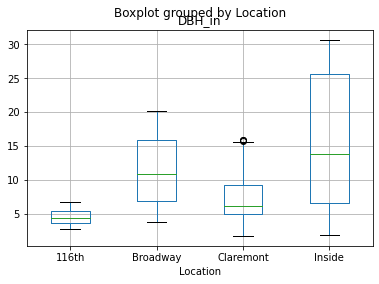

## Now what if we actually want the mean values of each of those in a table?  There is an easy way!

# Groupby
If you have large datasets groupby is your friend.  It helps you break up your data. I am going to give you some examples that might come in handy.  

## suppose you want the data by location??

In [23]:
df.groupby('Location').mean()

,Lat,Long,DBH_in
Location,,,
116th,40.808281,-73.964527,4.481667
Broadway,40.809578,-73.962916,11.226600
Claremont,40.809412,-73.964199,6.868102
Inside,40.809893,-73.963123,15.774638


### But we don't need the Lat and Long.  We just want the mean of DBH

In [24]:
df.groupby('Location')['DBH_in'].mean()

Location
116th         4.481667
Broadway     11.226600
Claremont     6.868102
Inside       15.774638
Name: DBH_in, dtype: float64

### What if you want the max?

In [25]:
df.groupby('Location')['DBH_in'].max()

Location
116th         6.74
Broadway     20.20
Claremont    15.86
Inside       30.69
Name: DBH_in, dtype: float64

### Can we just use describe?

In [26]:
df.groupby('Location')['DBH_in'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
116th,48.0,4.481667,1.128389,2.66,3.6700,4.295,5.307500,6.74
Broadway,100.0,11.226600,4.890487,3.70,6.8875,10.830,15.852500,20.20
Claremont,147.0,6.868102,3.346942,1.69,4.8650,6.090,9.175000,15.86
Inside,69.0,15.774638,9.320587,1.89,6.5800,13.790,25.616667,30.69


### If you wanted to save the data just send to_excel.

In [27]:
df.groupby('Location')['DBH_in'].describe().to_excel('Grouped_by_location.xlsx')

# Two Categories at once! 

### You can also count and group by two categories.  We could do location and native versus non-native.  First lets get percentages

In [28]:
df[['Location','Origin']].value_counts()

Location   Origin    
Claremont  Non-Native    80
Broadway   Non-Native    58
Inside     Non-Native    46
116th      Native        42
Broadway   Native        36
Inside     Native        19
Claremont  Native        16
dtype: int64

### What do you want as a denominator?
-  All trees

In [33]:
df[['Location','Origin']].value_counts()/df['Location'].count()

Location   Origin    
Claremont  Non-Native    0.219780
Broadway   Non-Native    0.159341
Inside     Non-Native    0.126374
116th      Native        0.115385
Broadway   Native        0.098901
Inside     Native        0.052198
Claremont  Native        0.043956
dtype: float64

### This is weird.  You could also do as a percentage of Origin.  So native adds to 100 and non-native adds to 100.  You need to use groupy and value_counts.  
- It works because groubpy passes back indexes and the math is done on the inex.  
- first lets do a groupby and a value_counts
-  We will groupby origin
-  then we will count the locations

In [37]:
df.groupby(['Origin'])['Location'].value_counts()

Origin      Location 
Native      116th        42
            Broadway     36
            Inside       19
            Claremont    16
Non-Native  Claremont    80
            Broadway     58
            Inside       46
Name: Location, dtype: int64

### Now in the bottom we just do counts.  So it will count native/non-native.  Lets try it first

In [39]:
df.groupby(['Origin'])['Location'].count()

Origin
Native        113
Non-Native    184
Name: Location, dtype: int64

### Now let's divide.

In [72]:
df.groupby(['Origin'])['Location'].value_counts()\
/df.groupby(['Origin'])['Location'].count()*100

Origin      Location 
Native      116th        37.168142
            Broadway     31.858407
            Inside       16.814159
            Claremont    14.159292
Non-Native  Claremont    43.478261
            Broadway     31.521739
            Inside       25.000000
Name: Location, dtype: float64

### I have trouble wrapping my mind around what I just did.  But it is sometimes really helpful.  

## The next thing you can do is a groupby loop.  Again weird.
- It goes for loops throug each group.
- it returns the group name and a dataframe for just that group.  
- It is convenient for making graphs in subgroups
- let's try.
- We will print the name and the mean for each group.

In [43]:
for grp, dfG in df.groupby('Location'):
    print (grp,'\n', dfG.mean(),'\n')


116th 
 old tree number    21.500000
Lat                40.808281
Long              -73.964527
DBH_in              4.481667
dtype: float64 

Broadway 
 old tree number     8.900000
Lat                40.809578
Long              -73.962916
DBH_in             11.226600
dtype: float64 

Claremont 
 Lat       40.809412
Long     -73.964199
DBH_in     6.868102
dtype: float64 

Inside 
 Lat       40.809893
Long     -73.963123
DBH_in    15.774638
dtype: float64 



<ipython-input-43-227802d139eb>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print (grp,'\n', dfG.mean(),'\n')


### Stay with me.  Let's switch and do it for old tree number.  So each tree becomes a group.  Then lets plot it versus time.....

<ipython-input-52-eb888ffb63fc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


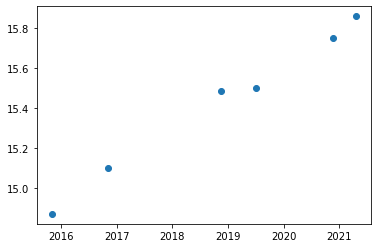

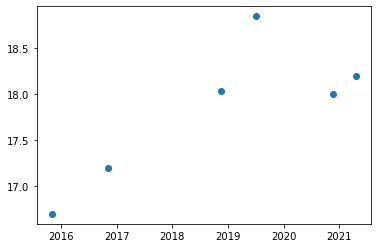

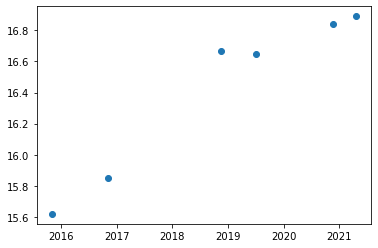

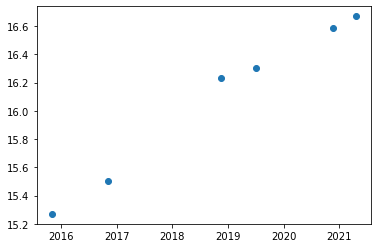

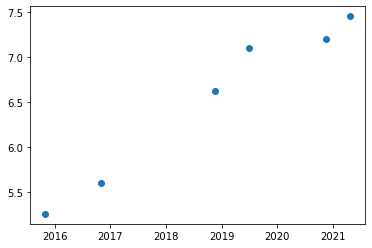

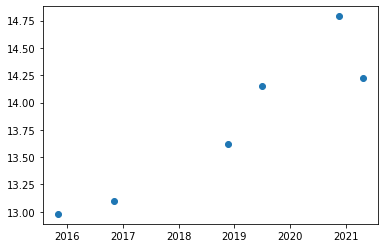

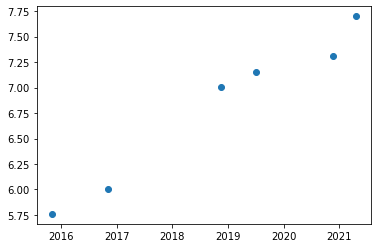

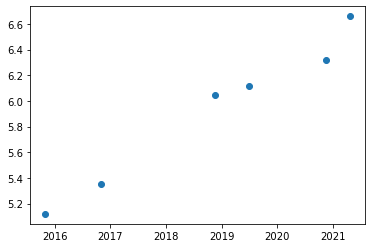

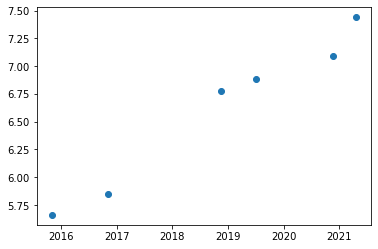

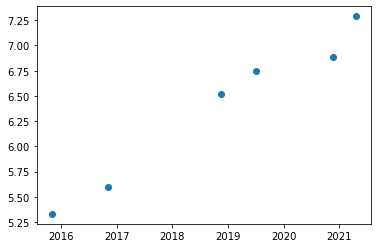

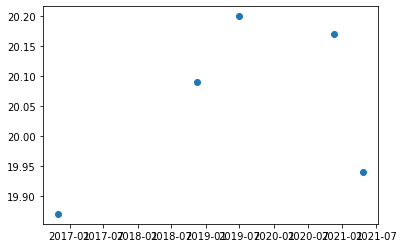

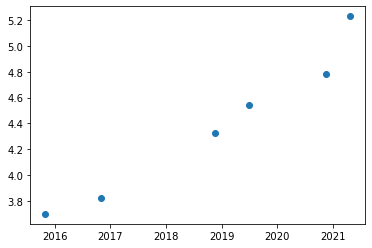

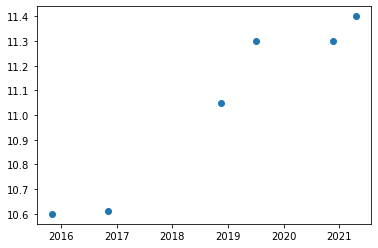

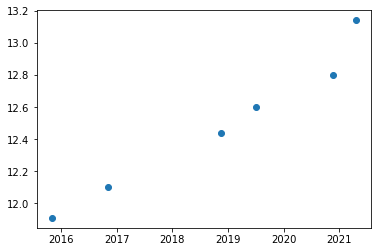

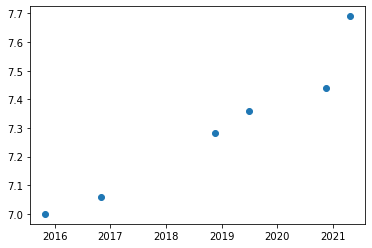

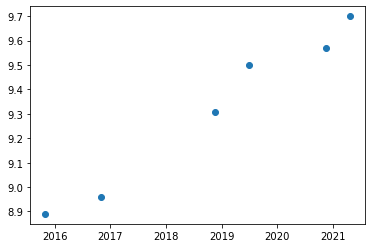

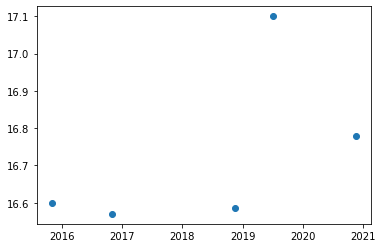

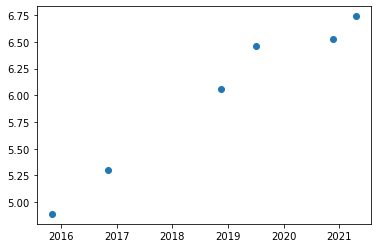

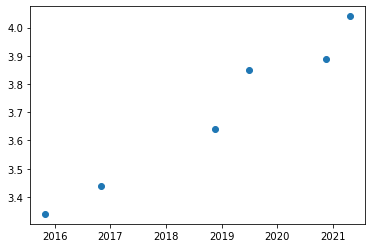

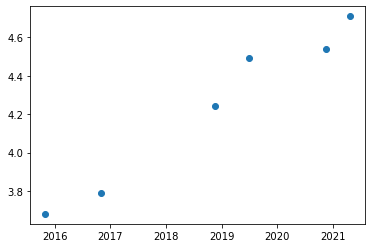

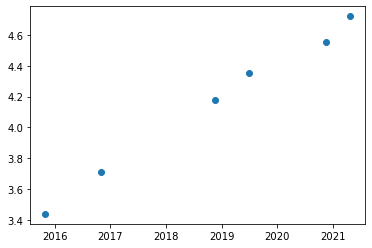

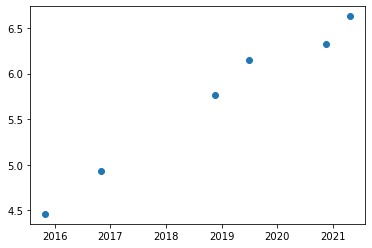

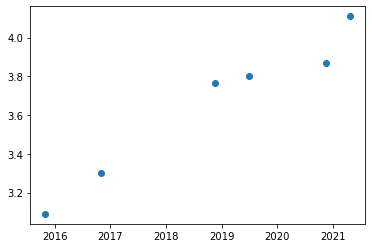

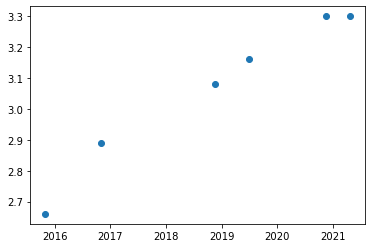

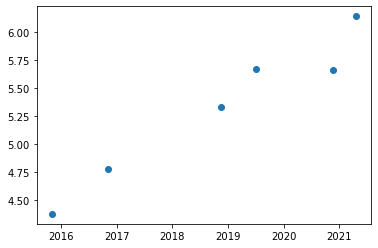

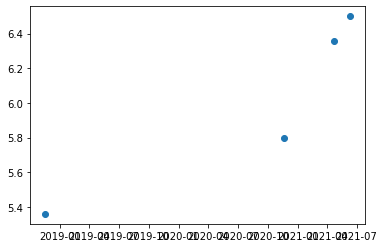

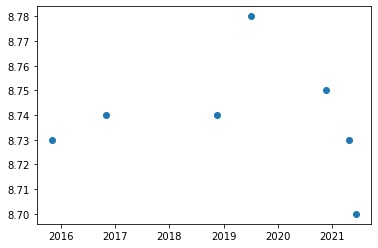

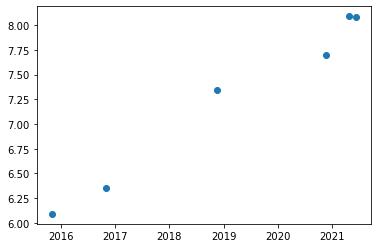

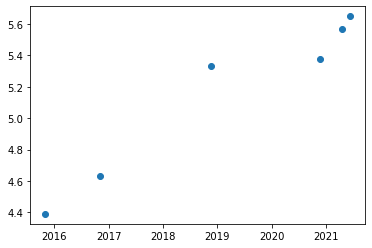

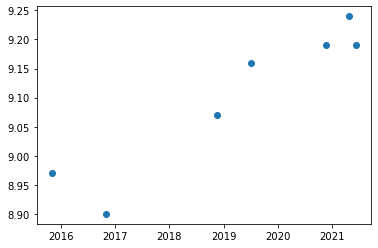

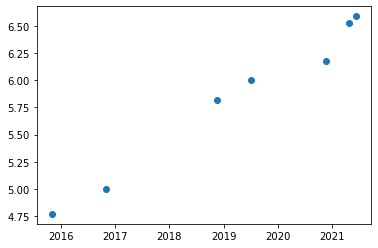

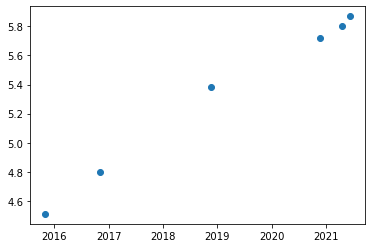

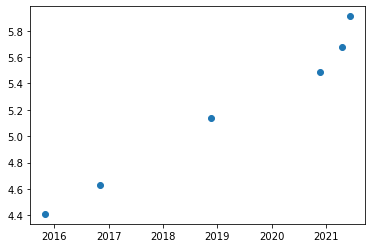

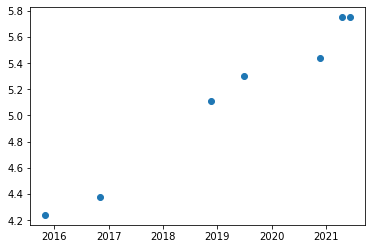

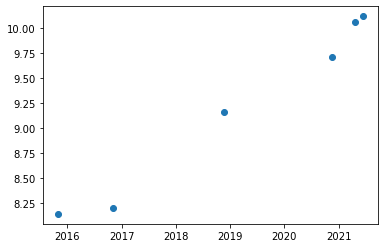

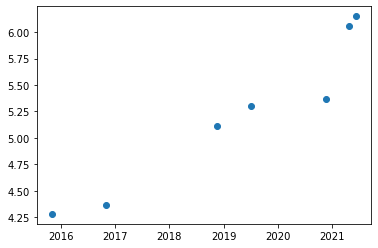

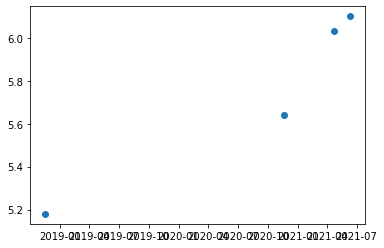

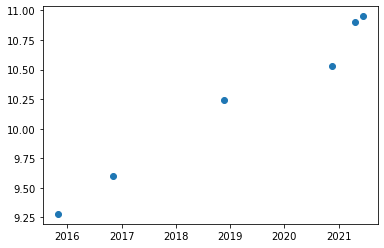

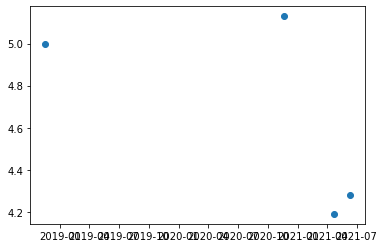

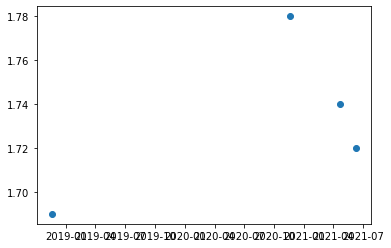

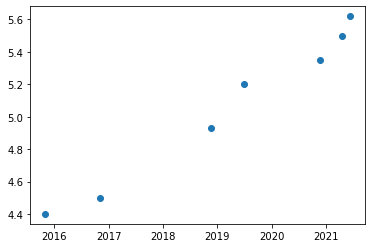

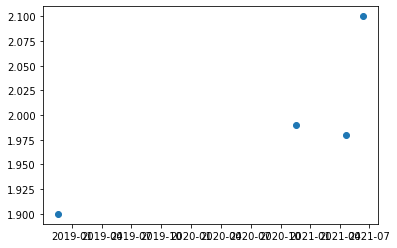

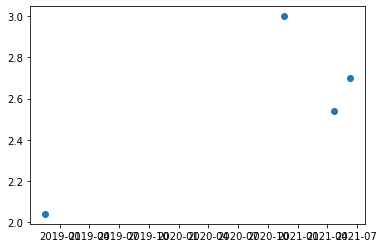

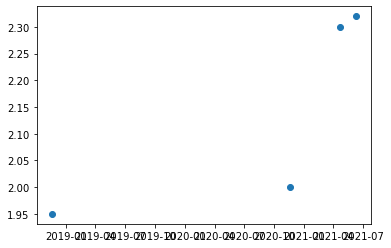

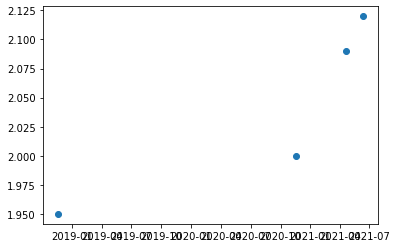

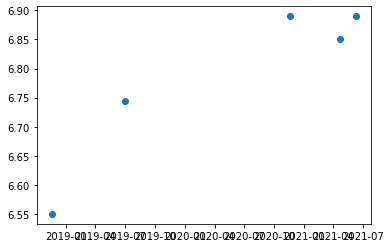

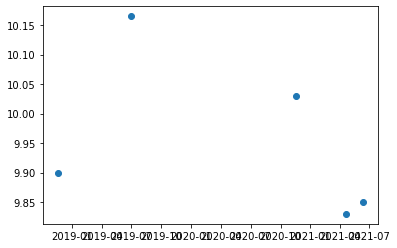

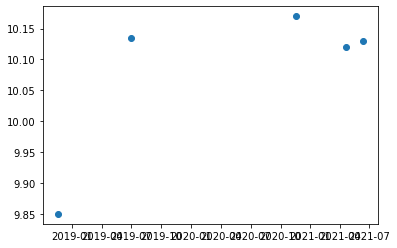

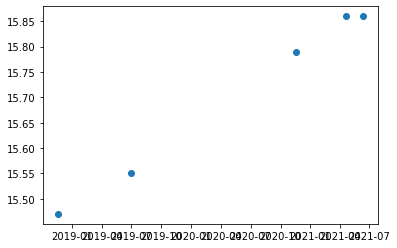

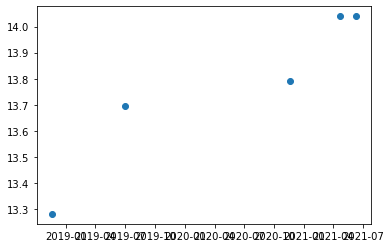

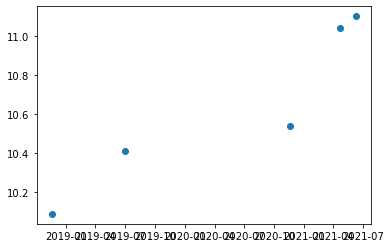

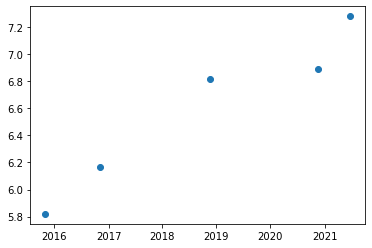

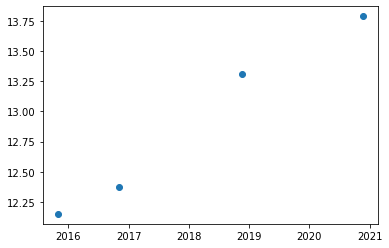

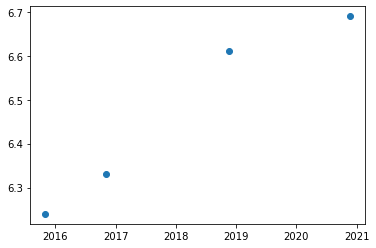

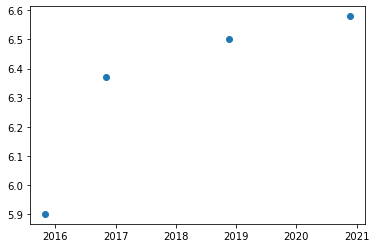

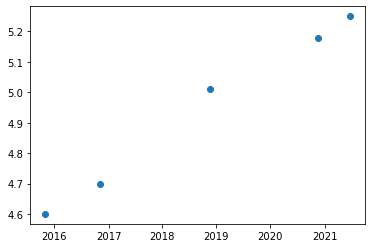

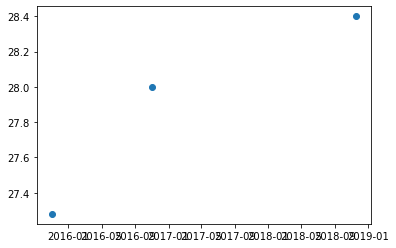

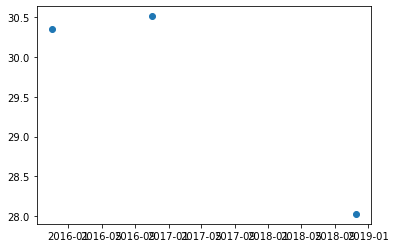

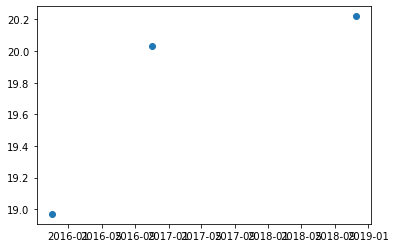

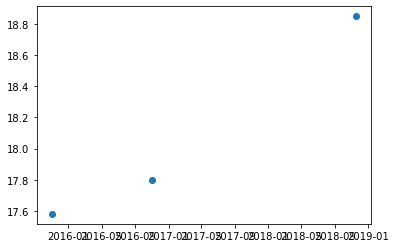

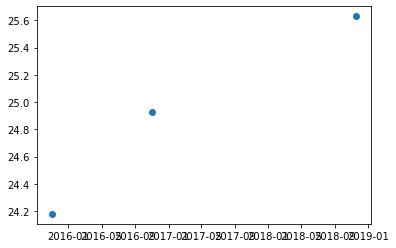

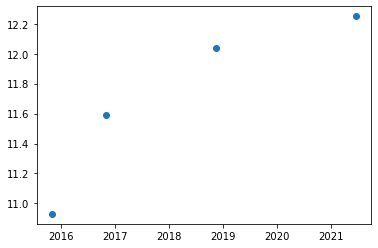

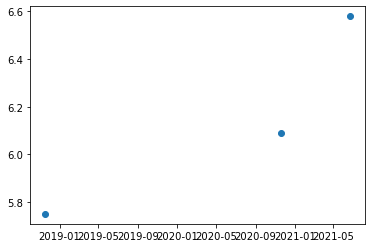

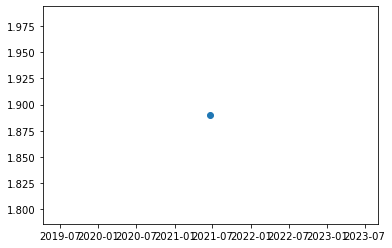

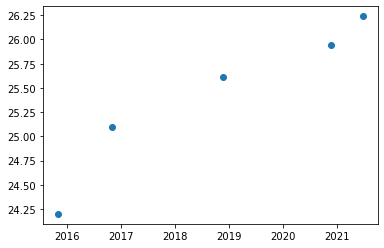

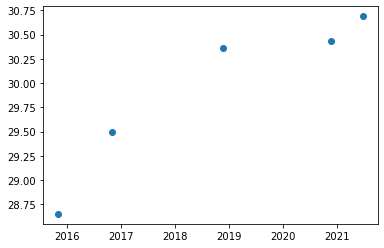

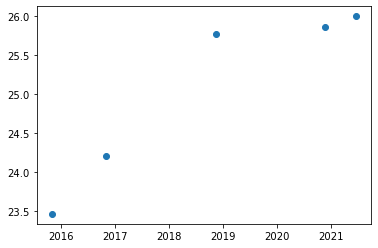

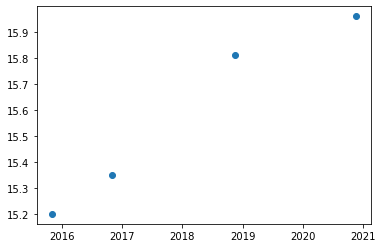

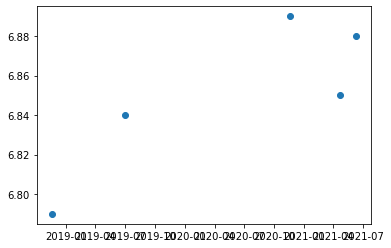

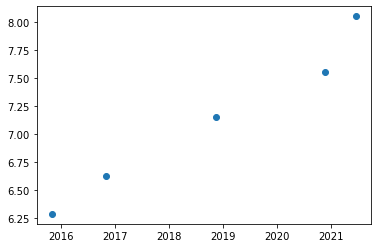

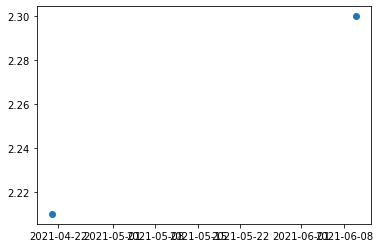

In [52]:
for grp, dfG in df.groupby('old tree number'):
    fig,ax=plt.subplots()
    ax.scatter(dfG['Date'],dfG['DBH_in'])


## That was cool.  I want the growth rate for each tree.  This is a reach.  
- First we are going to make a decimal year.  Go down to the last answer here.
https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years


In [47]:
from astropy.time import Time

In [49]:
df['Year']=Time(df['Date']).decimalyear

In [50]:
df['Year']

0      2015.832877
1      2016.833333
2      2018.879452
3      2019.495890
4      2020.882514
          ...     
359    2021.468493
360    2015.832877
361    2016.833333
362    2018.879452
363    2020.882514
Name: Year, Length: 364, dtype: float64

## I actually just figured that our and our life just got really simple!
- We are going to make a pdf
- one tree per page
- Each tree we will compute the growth rate!
- We will open a pdf
- we will ax.scatter
- we will save
- clear axes
- print the growth rate and p-value
- plot points and best fit line on graph
- intercept not needed
- I will add a title to each figure with the tree id and species
- grp is the tree id and dfG['species'].iloc[0] is the species as you just take the first one
- you will need linregress.  I did results=stats.linregress(dfG[['Year','DBH_in']].dropna())
- for my x_fit I did x_fit=np.array([dfG.Year.min(),dfG.Year.max()])
- Your homework is to hand in the pdf.
- You have almost done all of this before.  Just think what goes where!  It wrecked my mind a bit.  
- ignore the warnings!
- My answer is online

/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/bmaillou/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


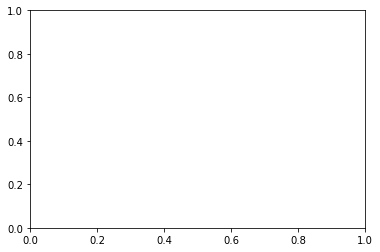

# ANSWER

<AxesSubplot:title={'center':'DBH_in'}, xlabel='Location'>

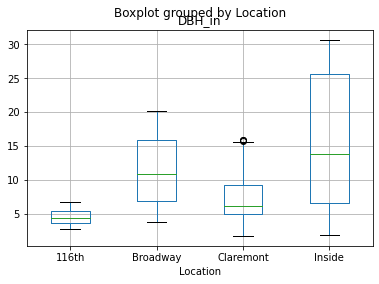

In [20]:
fig,ax=plt.subplots()
df.boxplot(column=['DBH_in'],ax=ax,by='Location')